In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Условия

## О датасете

Автор предлагает решить задачу классификации, описывая следующую ситуацию:

Существует компания-производитель мобильных телефонов, которой необходимо определить ценовой сегмент своей продукции. Для этого был собран набор данных, включающий характеристики телефонов и их принадлежность к одному из ценовых диапазонов. На основании этой информации требуется спрогнозировать, какой ценовой сегмент следует назначить новому устройству.

Компания определила следующие ценовые сегменты:  
0 - низкий ценовой сегмент  
1 - средний ценовой сегмент  
2 - высокий ценовой сегмент  
3 - премиальный ценовой сегмент  

## Файлы

Исходные файлы:  
- `test.csv` 
- `train.csv`  

Из задачи следует, что в файле `test` находятся телефоны компании, о чем говорит отсутсвие атрибута `price_range`. А `train` содержит информацию о смартфонах от других компаний.

## Атрибуты

Вот исправленный список в формате кода Markdown:

- `id` - идентификатор (`int64`)
- `battery_power` - мощность батареи (`int64`)
- `blue` - наличие Bluetooth (`bool`)
- `clock_speed` - тактовая частота (`float64`)
- `dual_sim` - наличие поддержки двух SIM-карт (`bool`)
- `fc` - фронтальная камера (мегапиксели) (`int64`)
- `four_g` - поддержка 4G (`bool`)
- `int_memory` - внутренняя память (ГБ) (`int64`)
- `m_dep` - глубина (см) (`float64`)
- `mobile_wt` - вес телефона (граммы) (`int64`)
- `n_cores` - количество ядер процессора (`int64`)
- `pc` - основная камера (мегапиксели) (`int64`)
- `px_height` - высота экрана в пикселях (`int64`)
- `px_width` - ширина экрана в пикселях (`int64`)
- `ram` - оперативная память (МБ) (`int64`)
- `sc_h` - высота экрана (см) (`int64`)
- `sc_w` - ширина экрана (см) (`int64`)
- `talk_time` - время разговора (часы) (`int64`)
- `three_g` - поддержка 3G (`bool`)
- `touch_screen` - наличие сенсорного экрана (`bool`)
- `wifi` - наличие Wi-Fi (`bool`)
- `price_range` - ценовой диапазон (`int64`)

## Постановка задач

Исходя из условий, было решено проводить анализ и обучать модели на данных из файла `train`. После того как обучение будет завершено и получит доверенный процент точности, каждому устройству из файла `test` будет присвоен его ценовой сегмент.

# Импорт данных

In [2]:
df_train_data = pd.read_csv("train.csv.xls")
df_test_data = pd.read_csv("test.csv.xls", index_col="id")

# 1. Анализ атрибутов

## Статистическая информация

In [3]:
df_train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Пропущенные значения

In [4]:
df_train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

В датафрейме нет пропущенных значений

## Проверка на выбросы

### Межквартильный размах (IQR)

Определим в каких столбцах находятся выбросы с помощью метода IQR. Для этого напишим следующую функцию:

In [5]:
def IQR(df):
    threshold = 1.5
    for col in df.columns:
        if type(col) == "str":
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = (df[col] < Q1 - threshold * IQR) | (df[col] > Q3 + threshold * IQR)
        print(f"{col} содержит {outliers.sum()} выбросов")

In [6]:
IQR(df_train_data)

battery_power содержит 0 выбросов
blue содержит 0 выбросов
clock_speed содержит 0 выбросов
dual_sim содержит 0 выбросов
fc содержит 18 выбросов
four_g содержит 0 выбросов
int_memory содержит 0 выбросов
m_dep содержит 0 выбросов
mobile_wt содержит 0 выбросов
n_cores содержит 0 выбросов
pc содержит 0 выбросов
px_height содержит 2 выбросов
px_width содержит 0 выбросов
ram содержит 0 выбросов
sc_h содержит 0 выбросов
sc_w содержит 0 выбросов
talk_time содержит 0 выбросов
three_g содержит 477 выбросов
touch_screen содержит 0 выбросов
wifi содержит 0 выбросов
price_range содержит 0 выбросов


### Результаты функции

Из результатов видно, что высота экрана (`px_height`) и фронтальная камера (`fc`) содержат небольшое количество аномалий. Построим гистограммы их распределений для визуальной оценки. Показатель `three_g` имеет значительно больше выбросов, но строить для него отдельный график не будем, поскольку он является булевым. Очевидно, что 477 - это количество телефонов без 3G. Удалять строки с такой аномалией не рекомендуется, так как это приведет к исчезновению всей категории телефонов без 3G, что может исказить анализ.

### Гистограммы распределения

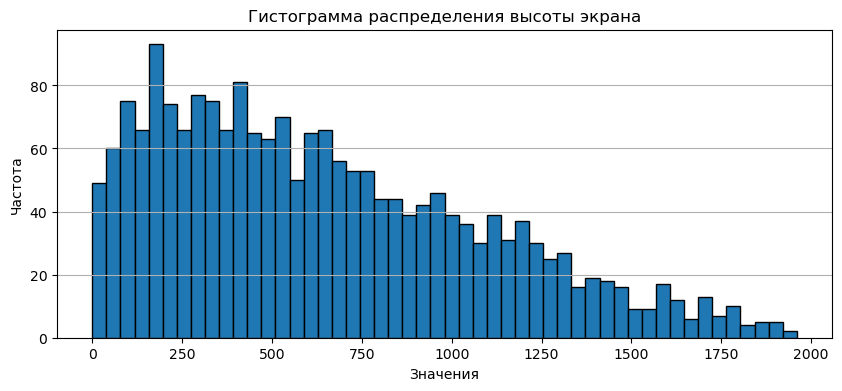

In [7]:
plt.figure(figsize=(10, 4))
plt.hist(df_train_data["px_height"], bins = 50, edgecolor = "black")

plt.title("Гистограмма распределения высоты экрана")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.grid(axis = "y")

Рассмотрев рисунок выше, можно сказать что два выброса дали телефоны, у которых высота экрана приближенна к 2000 пикс., выведем их:

In [8]:
df_train_data.sort_values("px_height", ascending=False).head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1771,1230,1,1.6,0,0,1,48,0.7,111,7,...,1960,1963,1622,18,17,16,1,1,1,2
988,1413,1,0.5,1,4,1,45,0.4,104,5,...,1949,1994,2973,17,8,15,1,0,1,3


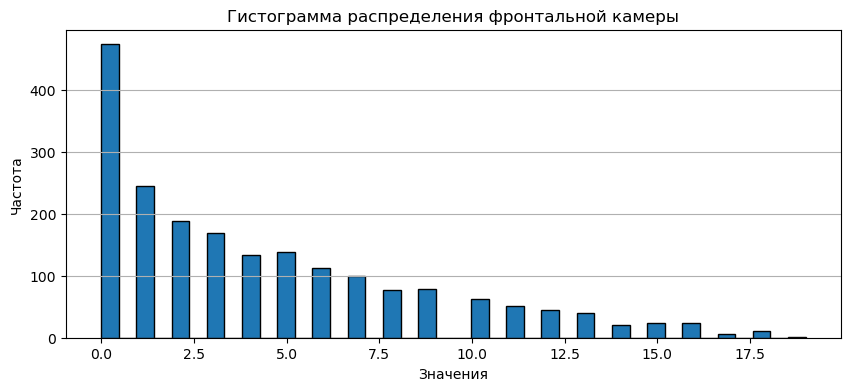

In [9]:
plt.figure(figsize=(10, 4))
plt.hist(df_train_data["fc"], bins = 40, edgecolor = "black")

plt.title("Гистограмма распределения фронтальной камеры")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.grid(axis = "y")

Здесь наблюдается аналогичная ситуация: выбросы возникли около значения 17.5 Мпкс., вот эти строки:

In [10]:
df_train_data.sort_values("fc", ascending=False).head(18)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1705,1290,1,1.4,1,19,1,35,0.3,110,4,...,405,742,879,16,2,8,1,0,0,0
1554,1957,0,1.2,1,18,1,36,0.8,151,2,...,1194,1727,1115,16,2,18,1,0,1,1
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,0,1,0,1
1416,1448,0,0.5,1,18,0,2,0.2,100,5,...,846,1144,593,9,4,18,1,1,1,0
1882,591,0,2.1,1,18,1,16,0.5,196,7,...,952,1726,704,14,5,4,1,1,1,0
1888,1544,0,2.4,0,18,1,12,0.1,186,7,...,470,844,489,9,4,2,1,0,1,0
1387,1533,1,1.1,1,18,1,17,0.3,160,4,...,1054,1393,2520,8,2,11,1,0,1,2
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1869,1942,955,18,11,7,1,1,1,1
1880,1720,0,1.6,0,18,1,2,0.8,188,5,...,334,896,2522,10,5,2,1,0,1,2


# 2. Определение корреляции

#### Матрица корреляции

In [11]:
corr_matrix = df_train_data.corr()
corr_matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

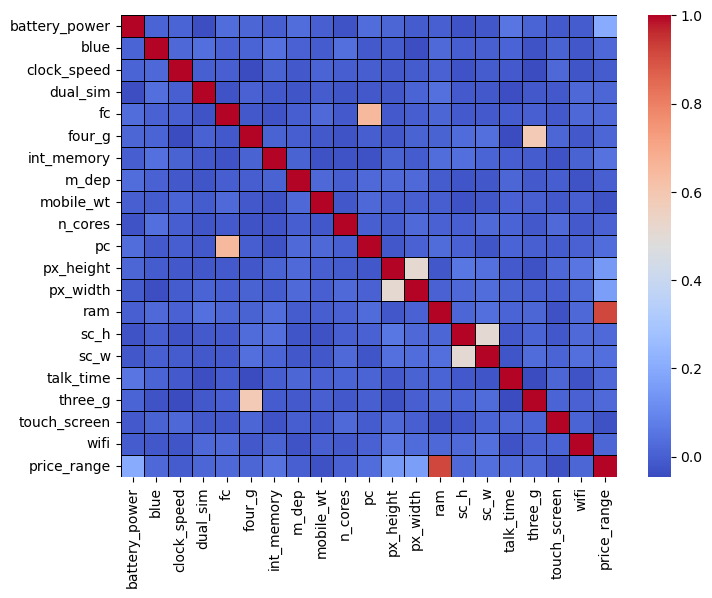

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, linewidths=0.5, linecolor="black", cmap='coolwarm')


In [13]:
# Функция которая вернет отсортированные и уникальные значения кор. матрицы.
def get_unique_corr_values(correlation_matrix):
    correlation_series = correlation_matrix.unstack().sort_values(ascending=False)
    
    unique_indexes_values = []
    for index, value in correlation_series.items():
        idx1, idx2 = index
        if (idx2, idx1, value) in unique_indexes_values:
            continue
        unique_indexes_values.append((idx1, idx2, value))
    
    return pd.DataFrame(unique_indexes_values, columns=['Feature1', 'Feature2', 'Correlation Value'])

# Функция для оценки силы связи
def strength_of_correlation(correlation_value):
    if correlation_value < 0.3:
        return "Very Weak"
    elif 0.3 <= correlation_value < 0.5:
        return "Weak"
    elif 0.5 <= correlation_value < 0.7:
        return "Medium"
    elif 0.7 <= correlation_value < 0.9:
        return "Strong"
    elif correlation_value >= 0.9:
        return "Very Strong"
    


### Характер корреляции
Оценим характер корреляции для каждой комбинации атрибутов:

In [14]:
corr_matrix_values = get_unique_corr_values(corr_matrix)
corr_matrix_values['Strenght'] = corr_matrix_values['Correlation Value'].apply(strength_of_correlation)

corr_matrix_values

,Feature1,Feature2,Correlation Value,Strenght
0,battery_power,battery_power,1.000000,Very Strong
1,px_height,px_height,1.000000,Very Strong
2,dual_sim,dual_sim,1.000000,Very Strong
3,fc,fc,1.000000,Very Strong
4,four_g,four_g,1.000000,Very Strong
...,...,...,...,...
226,dual_sim,battery_power,-0.041847,Very Weak
227,talk_time,three_g,-0.042688,Very Weak
228,clock_speed,four_g,-0.043073,Very Weak
229,three_g,clock_speed,-0.046433,Very Weak


## Матрица графиков рассеяния

В нашем датасете 21 атрибут, из-за этого матрица рассеяния будет неразборчивой, поэтому оставим только признаки со средней силой связи и выше.

In [15]:
unique_features = corr_matrix_values.query("`Feature1`!= `Feature2` & `Correlation Value`.abs() >= 0.5")
scatter_features = list(unique_features["Feature1"]) + list(unique_features["Feature2"])
unique_features

,Feature1,Feature2,Correlation Value,Strenght
21,price_range,ram,0.917046,Very Strong
22,fc,pc,0.644595,Medium
23,three_g,four_g,0.584246,Medium
24,px_width,px_height,0.510664,Medium
25,sc_w,sc_h,0.506144,Medium


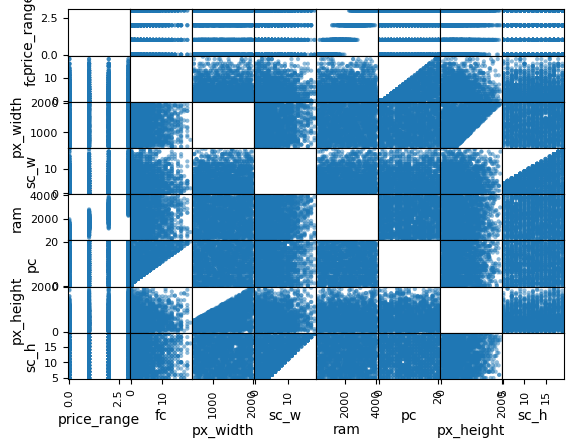

In [16]:
# Удалим столбцы 3g и 4g, так как они бинарные и несут мало информации.
scatter_features.remove("four_g")
scatter_features.remove("three_g")

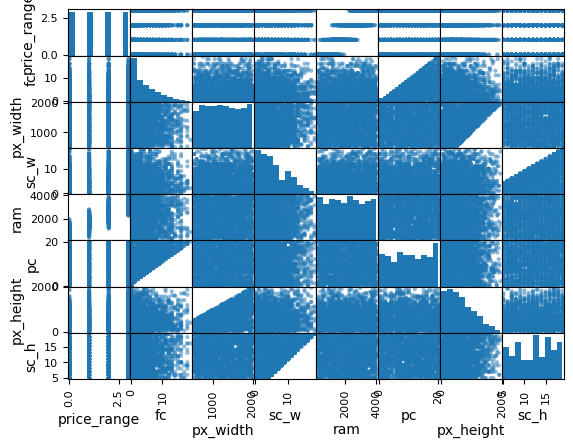

In [26]:
pd.plotting.scatter_matrix(df_train_data[scatter_features])

plt.show()


При анализе матрицы графиков можно отметить, что на диагонали представлены гистограммы частот, а в остальных ячейках находятся диаграммы рассеивания. На этих диаграммах можно заметить взаимосвязь лишь между атрибутами, упомянутыми ранее. В остальных случаях графики заполнены точками, и различить на них что-либо практически невозможно, за исключением вывода о крайне слабой зависимости.

Сильная положительная линейная зависимость отмечается только между атрибутами оперативной памяти и ценового сегмента.   
Остальные атрибуты формируют графики, разделяющиеся вдоль диагонали и образующие треугольники. Это также свидетельствует о наличии линейной зависимости, хотя она менее выраженная.